In [124]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy.ndimage import filters
from math import pi

# load image

(256, 256, 3)


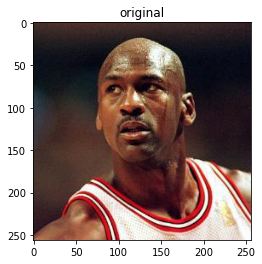

(256, 256, 3)


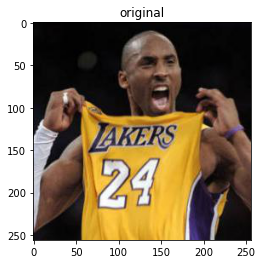

(96, 96, 3)


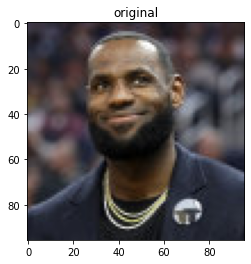

(256, 256, 3)


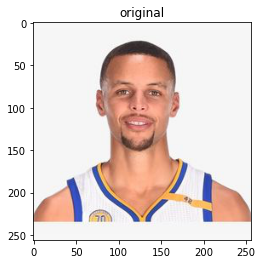

(225, 225, 3)


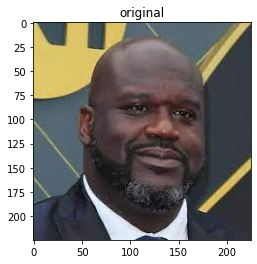

(128, 128, 3)


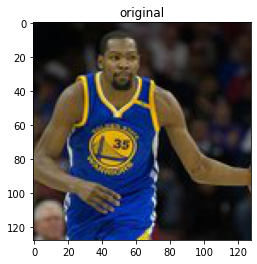

In [126]:
import numpy as np 
import matplotlib.pyplot as plt 

mj = plt.imread("person0.jpg")
kobe = plt.imread("person1.jpg") 
lbj  = plt.imread("person2.jpg") 
curry  = plt.imread("person3.jpg") 
shaq  = plt.imread("person4.jpg") 
kd = plt.imread("person5.jpg")

print(mj.shape)
plt.imshow(mj)
plt.title('original') 
plt.show()

print(kobe.shape)
plt.imshow(kobe)
plt.title('original') 
plt.show()

print(lbj.shape)
plt.imshow(lbj)
plt.title('original') 
plt.show()

print(curry.shape)
plt.imshow(curry)
plt.title('original') 
plt.show()

print(shaq.shape)
plt.imshow(shaq)
plt.title('original') 
plt.show()

print(kd.shape)
plt.imshow(kd)
plt.title('original') 
plt.show()

# rbg2gray

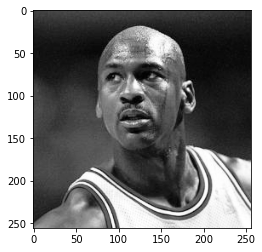

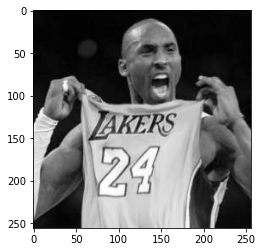

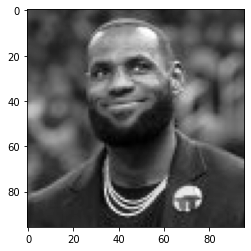

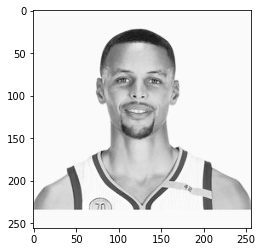

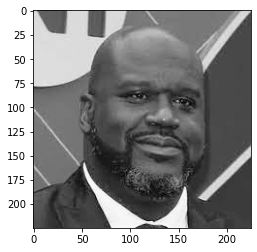

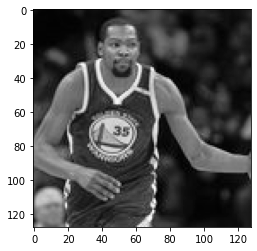

In [128]:
#  Y' = 0.299 R + 0.587 G + 0.114 B 
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

mj_gray = rgb2gray(mj)  
plt.imshow(mj_gray, cmap='Greys_r')
plt.show()

kobe_gray = rgb2gray(kobe)  
plt.imshow(kobe_gray, cmap='Greys_r')
plt.show()

lbj_gray = rgb2gray(lbj)  
plt.imshow(lbj_gray, cmap='Greys_r')
plt.show()

curry_gray = rgb2gray(curry)  
plt.imshow(curry_gray, cmap='Greys_r')
plt.show()

shaq_gray = rgb2gray(shaq)  
plt.imshow(shaq_gray, cmap='Greys_r')
plt.show()

kd_gray = rgb2gray(kd)  
plt.imshow(kd_gray, cmap='Greys_r')
plt.show()

# Image Interpolation Methods : image enlargement

##### Nearest Neighbor


In [5]:
def NN_interpolation(a, n):
    # 參數s: 放大倍數
    # 先創一個空矩陣
    temp = np.zeros((a.shape[0] * n, a.shape[1] * n))
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i*n:i*n+n,j*n:j*n+n] = a[i][j]
    return temp

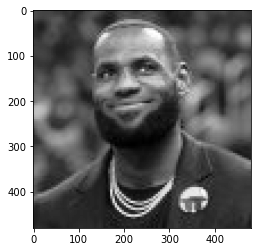

In [6]:
lbj_large = NN_interpolation(lbj_gray, 5)
plt.imshow(lbj_large, cmap='Greys_r')
plt.show()
plt.imsave('lbj_large.png', lbj_large, cmap='Greys_r')
plt.imsave('lbj_original.png', lbj_gray, cmap='Greys_r')

#### Bilinear


#### Bicubic

# Intensity Transformations: for contrast enhancement.

##### gamma correction(指數變換): s = c * r ** gamma

In [7]:
def gamma_correction(a, gamma):
    c = 1  # 參數 大部分設成1
    s = c * a ** gamma
    return s

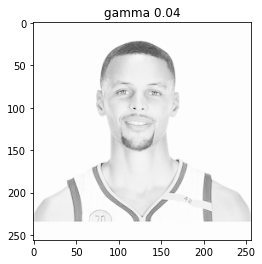

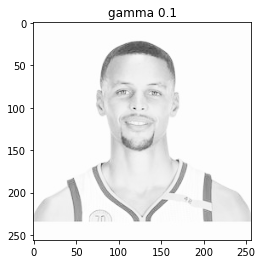

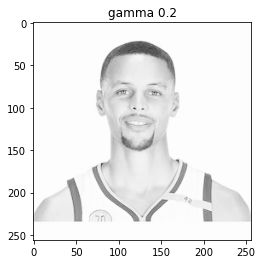

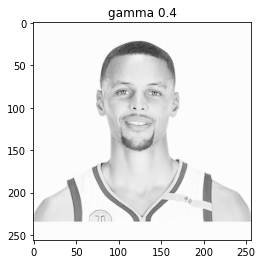

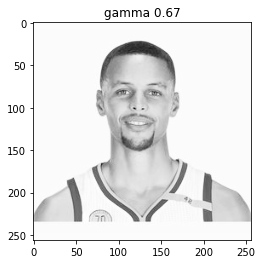

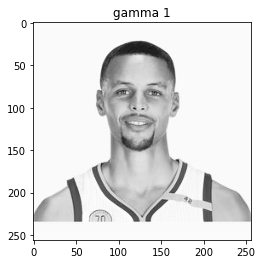

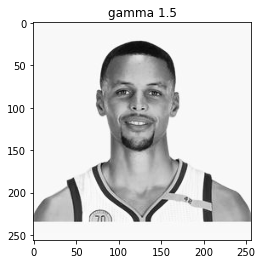

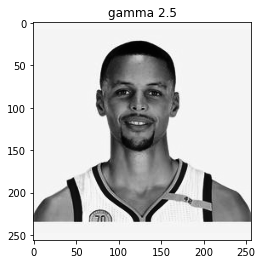

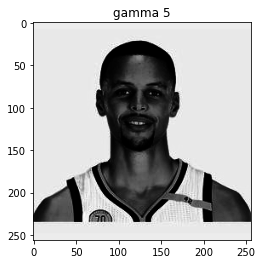

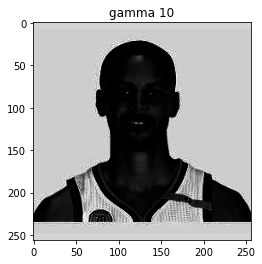

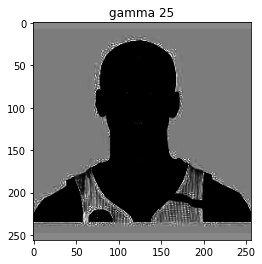

In [8]:
gammalist = [0.04, 0.1, 0.2, 0.4, 0.67, 1, 1.5, 2.5, 5, 10, 25]
for gamma in gammalist:
    s = gamma_correction(curry_gray, gamma)
    plt.title('gamma {}'.format(gamma)) 
    plt.imshow(s, cmap='Greys_r')
    plt.show()

##### Histogram Equalization

In [9]:
def he(a):
    # 劃出未he的長條圖
    original = a.reshape(-1)
    plt.subplot(2,1,1) 
    plt.title('original') 
    plt.hist(original, bins=256)
    plt.show()
    
    
    # 參考:https://codeinfo.space/imageprocessing/histogram-equalization/
    hist, bins = np.histogram(a.reshape(-1), bins=256, range=[0,255])
    pdf = hist/a.size                                  # hist(出現次數)/總像素點 = 機率 (pdf)
    cdf = pdf.cumsum()                                 # 將每一個灰度級的機率利用cumsum()累加，變「累積概率」(cdf)
    equ_value = np.around(cdf * 255).astype('uint8')   #將cdf的結果，乘以255，再四捨五入，得出「均衡化值」
             
    img2int = np.around(a.reshape(-1)).astype(int)     # 將灰度轉成int
    
    temp = np.zeros(a.reshape(-1).shape[0])
    for i, pixel in enumerate(img2int):                # 轉成均衡化的灰度
        temp[i] = equ_value[pixel]

    he = temp.reshape((a.shape[0], a.shape[1]))
    
    # 畫直方灰度圖 
    plt.subplot(2,1,2) 
    plt.hist(temp, bins=256)
    plt.title('he')
    plt.show()
    
    return he

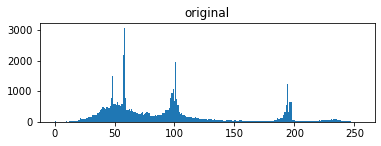

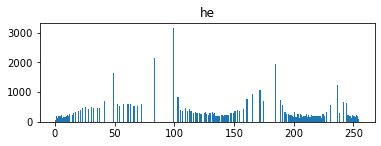

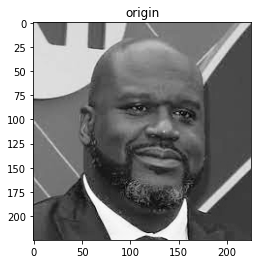

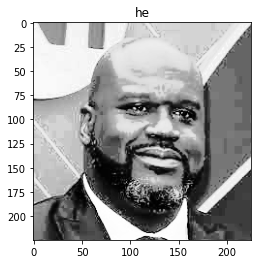

In [10]:
shaq_he = he(shaq_gray)

# 畫出未he原圖
plt.imshow(shaq_gray, cmap='Greys_r')
plt.title("origin")
plt.show()

plt.imshow(shaq_he, cmap='Greys_r')
plt.title("he")
plt.show()

# Contrast Enhancement for Color Images

##### Method 1-1: Do it separately for the RGB channels by HE

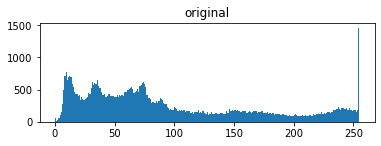

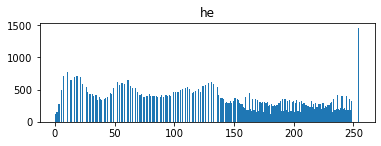

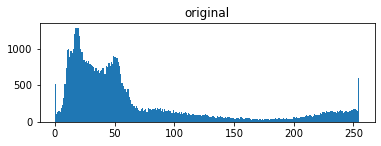

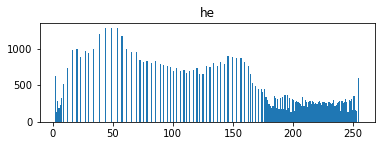

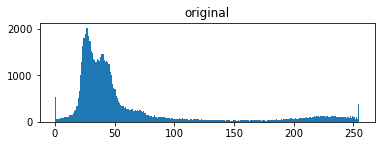

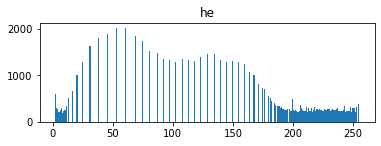

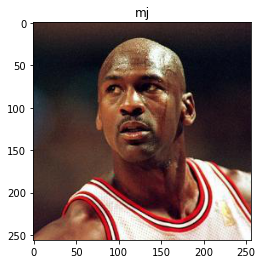

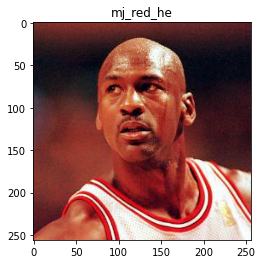

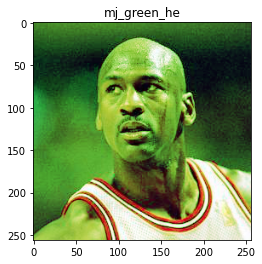

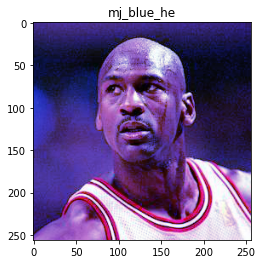

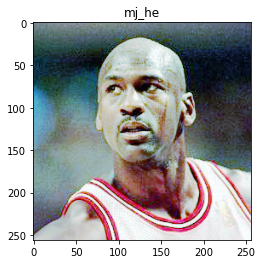

In [11]:
mj_red = mj[:,:,0]
mj_red_he_t = he(mj_red)
mj_red_he = np.stack((mj_red_he_t, mj[:,:,1], mj[:,:,2]), axis=2).astype(int) 

mj_green = mj[:,:,1]
mj_green_he_t = he(mj_green)
mj_green_he = np.stack((mj[:,:,0], mj_green_he_t, mj[:,:,2]), axis=2).astype(int) 

mj_blue = mj[:,:,2]
mj_blue_he_t = he(mj_blue)
mj_blue_he = np.stack((mj[:,:,0], mj[:,:,1], mj_blue_he_t), axis=2).astype(int) 

mj_he = np.stack((mj_red_he_t, mj_green_he_t, mj_blue_he_t), axis=2).astype(int) 

# 畫出未he原圖
plt.imshow(mj)
plt.title("mj")
plt.show()

plt.imshow(mj_red_he)
plt.title("mj_red_he")
plt.show()

plt.imshow(mj_green_he)
plt.title("mj_green_he")
plt.show()

plt.imshow(mj_blue_he)
plt.title("mj_blue_he")
plt.show()

plt.imshow(mj_he)
plt.title("mj_he")
plt.show()

##### Method 1-2: Do it separately for the RGB channels by gamma

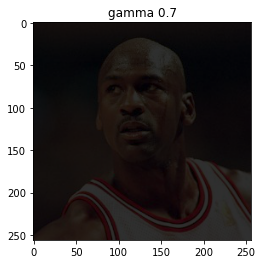

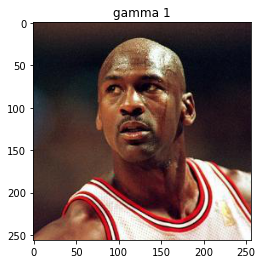

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


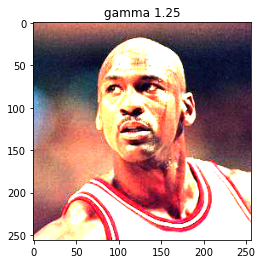

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


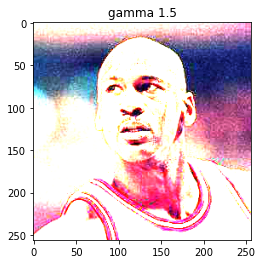

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


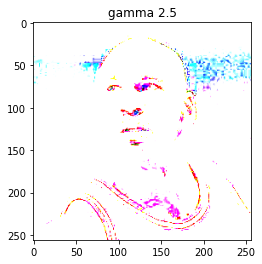

In [12]:
gammalist = [0.7, 1, 1.25, 1.5, 2.5]
for gamma in gammalist:
    mj_red_gamma   = gamma_correction(mj_red, gamma)
    mj_green_gamma = gamma_correction(mj_green, gamma)
    mj_blue_gamma  = gamma_correction(mj_blue, gamma)
    mj_gamma = np.stack((mj_red_gamma, mj_green_gamma, mj_blue_gamma), axis=2).astype(int) 

    plt.imshow(mj_gamma)
    plt.title("gamma {}".format(gamma))
    plt.show()

# Smoothing Filters: create a blurred version of the input image

##### box filter(average filter)

In [13]:
def box_filter(a, n):
    # 參數n: 模糊方框大小，限定奇數
    padding = n-1
    # 先補外框，創一個空矩陣
    temp = np.zeros((a.shape[0] + padding, a.shape[1] + padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding//2][j+padding//2] = a[i][j]
    
    # average
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = np.average(temp[i:i+padding+1, j:j+padding+1])
    return blur

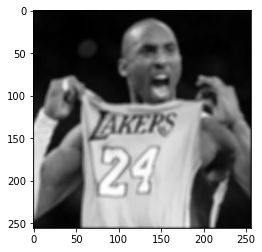

In [14]:
kobe_box = box_filter(kobe_gray, n=5)
plt.imshow(kobe_box, cmap='Greys_r')
plt.show()

##### Max and Min Filters

In [39]:
def min_filter(a, n):
    # 參數n: 模糊方框大小，限定奇數
    padding = n-1
    # 先補外框，創一個空矩陣
    temp = np.zeros((a.shape[0] + padding, a.shape[1] + padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding//2][j+padding//2] = a[i][j]
    
    # maximum
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = np.min(temp[i:i+padding+1, j:j+padding+1])
            
    return blur

def max_filter(a, n):
    # 參數n: 模糊方框大小，限定奇數
    padding = n-1
    # 先補外框，創一個空矩陣
    temp = np.zeros((a.shape[0] + padding, a.shape[1] + padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding//2][j+padding//2] = a[i][j]
    
    # maximum
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = np.max(temp[i:i+padding+1, j:j+padding+1])
            
    return blur

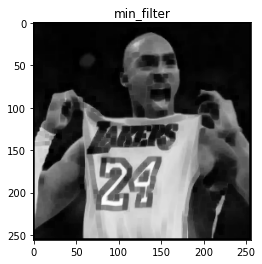

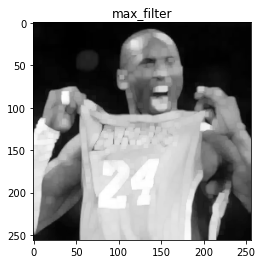

In [41]:
kobe_min = min_filter(kobe_gray, n=5)
plt.title("min_filter")
plt.imshow(kobe_min, cmap='Greys_r')
plt.show()

kobe_max = max_filter(kobe_gray, n=5)
plt.title("max_filter")
plt.imshow(kobe_max, cmap='Greys_r')
plt.show()

##### Median Filters

In [17]:
def median_filter(a, n):
    # 參數n: 模糊方框大小，限定奇數
    padding = n-1
    # 先補外框，創一個空矩陣
    temp = np.zeros((a.shape[0] + padding, a.shape[1] + padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding//2][j+padding//2] = a[i][j]
    
    # midian
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = np.median(temp[i:i+padding+1, j:j+padding+1])
    return blur

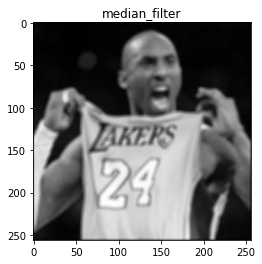

In [46]:
kobe_median = box_filter(kobe_gray, n=5)
plt.title("median_filter")
plt.imshow(kobe_median, cmap='Greys_r')
plt.show()

##### Gaussian Smoothing Filter

In [166]:
def gaussian_filter(a, n, sigma):
    '''
    n: 模糊方框大小，限定奇數
    sigma: 平滑化程度是由標準差σ來控制，σ值越大，平滑程度越高，相對的，影像越模糊
    '''
    padding = n-1
    # 先補外框，創一個空矩陣
    temp = np.zeros((a.shape[0] + padding, a.shape[1] + padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding//2][j+padding//2] = a[i][j]
    
    # gaussian kernel
    x, y = np.mgrid[-(n//2):(n//2)+1, -(n//2):(n//2)+1]
    gaussian_kernel = 1/(2*pi*sigma**2)*np.exp(-(x**2+y**2)/2*(sigma**2))
    
    # gaussian filter
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = (temp[i:i+padding+1, j:j+padding+1] * gaussian_kernel).sum()
            
    return blur

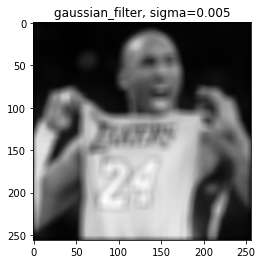

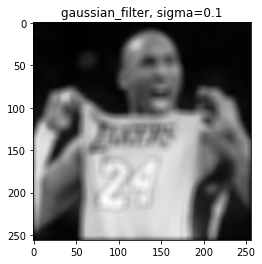

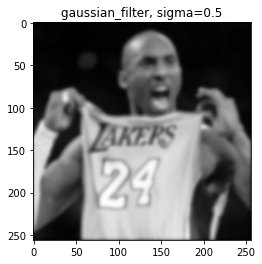

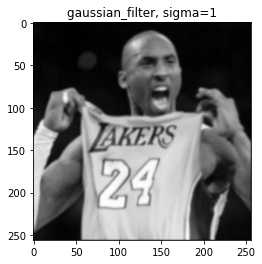

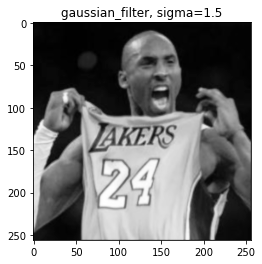

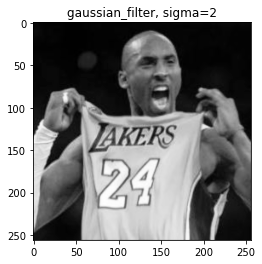

In [181]:
sigma_list = [0.005, 0.1, 0.5, 1, 1.5, 2] 
for sigma in sigma_list:
    kobe_gaussian = gaussian_filter(kobe_gray, n=11, sigma=sigma)
    plt.title("gaussian_filter, sigma={}".format(sigma))
    plt.imshow(kobe_gaussian, cmap='Greys_r')
    plt.show()

##### Laplacian Filter

In [120]:
def laplacian_filter(a, n=3):
    '''
    n:3, laplacian kernel固定3維 
    sigma: 平滑化程度是由標準差σ來控制，σ值越大，平滑程度越高，相對的，影像越模糊
    '''
    padding = n-1
    # 先補外框，創一個空矩陣
    temp = np.zeros((a.shape[0] + padding, a.shape[1] + padding))  
    blur = np.zeros((a.shape[0], a.shape[1]))  
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            temp[i+padding//2][j+padding//2] = a[i][j]
    
    # laplacian kernel
    laplacian_kernel = np.array([[0,1,0],
                                 [1,-4,1],
                                 [0,1,0]])
    
    # gaussian filter
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            blur[i][j] = (temp[i:i+padding+1, j:j+padding+1] * laplacian_kernel).sum()
            
    return blur

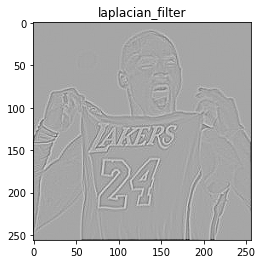

In [121]:
kobe_laplacian = laplacian_filter(kobe_gray, n=3)
plt.title("laplacian_filter")
plt.imshow(kobe_laplacian, cmap='Greys_r')
plt.show()